**importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data

data = pd.DataFrame(pd.read_csv('C:\\Users\\NGSi\\Downloads\\train.csv'))
test = pd.DataFrame(pd.read_csv('C:\\Users\\NGSi\\Downloads\\test.csv'))

In [3]:
data.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
#see the numerical and categorical data , note that we only feed numerical data  to the algorithm

numerical_data   = data.select_dtypes(include = [np.number]).columns
categorical_data = data.select_dtypes(include= [np.object]).columns

In [10]:
numerical_data

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [11]:
categorical_data

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [12]:
#great way to see all missing data at once

missing_values = data.isnull().sum().sort_values(ascending = False)

percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])



,Missing values,% Missing
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [13]:

test_missing_values = test.isnull().sum().sort_values(ascending = False)

percentage_test_missing_values = (test_missing_values/len(test))*100
pd.concat([test_missing_values, percentage_test_missing_values], axis = 1, keys= ['Missing values_in_test', '% Missing'])


,Missing values_in_test,% Missing
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [14]:
data.Age.tail()

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

In [15]:
#filling the missing points in age and fare columns 

data['Age'] = data['Age'].interpolate()
data['Fare'] = data['Fare'].interpolate()

#same thing for test

test['Age'] = test['Age'].interpolate()
test['Fare'] = test['Fare'].interpolate()

In [16]:
data.Age.isnull().sum() , test.Age.isnull().sum() 

(0, 0)

In [17]:
data.Fare.isnull().sum() ,test.Fare.isnull().sum()

(0, 0)

In [18]:
#done !!

In [19]:
 data['Embarked'] = data['Embarked'].fillna('S')

In [20]:
data['Embarked'].isnull().sum()

0

In [21]:
#encoding the categorical_data is a common way to do things 

data['Sex'] = data['Sex'].map({'male': 1, 'female': 2})

data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )


In [22]:
#same thing

test['Sex'] = test['Sex'].map({'male': 1, 'female': 2})

test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )


In [23]:
#run the code again to make sure

numerical_data   = data.select_dtypes(include = [np.number]).columns

categorical_data = data.select_dtypes(include= [np.object]).columns

In [24]:
print(numerical_data)
print(categorical_data)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')
Index(['Name', 'Ticket', 'Cabin'], dtype='object')


In [25]:
test_numerical_data   = test.select_dtypes(include = [np.number]).columns

test_categorical_data = test.select_dtypes(include= [np.object]).columns

In [26]:
print(test_numerical_data)
print(test_categorical_data)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
Index(['Name', 'Ticket', 'Cabin'], dtype='object')


**heatmaps are a great way to see the correlation between the 'survived' column and the other columns**

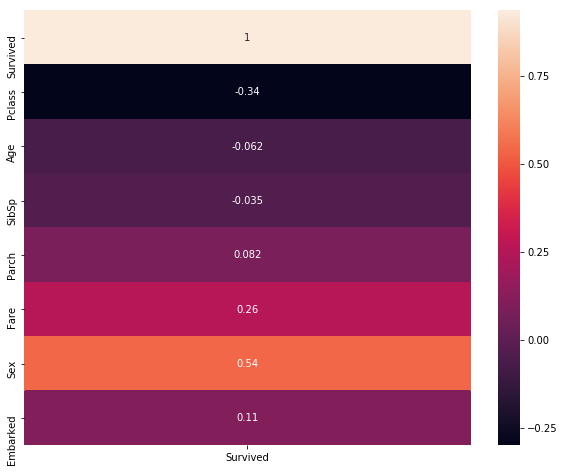

In [27]:
#this are the columns that i consider as factors for survival

factors = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex','Embarked']

plt.figure(figsize=(10,8))

sns.heatmap((data[factors].corr().filter(items = ['Survived'])),annot=True, robust=True)


In [28]:
data = data.drop(columns = ['PassengerId' ,'Cabin','Ticket','Name'] , axis = 1)

**this categorical_data is no relevant with the survival and will only cause noise so i will just delete'em from the data**

In [29]:
test = test.drop(columns = ['Cabin','Ticket','Name'] , axis = 1)

In [30]:
data.shape , test.shape

((891, 8), (418, 8))

**the boxplots are a great tool to  detect outliers** 

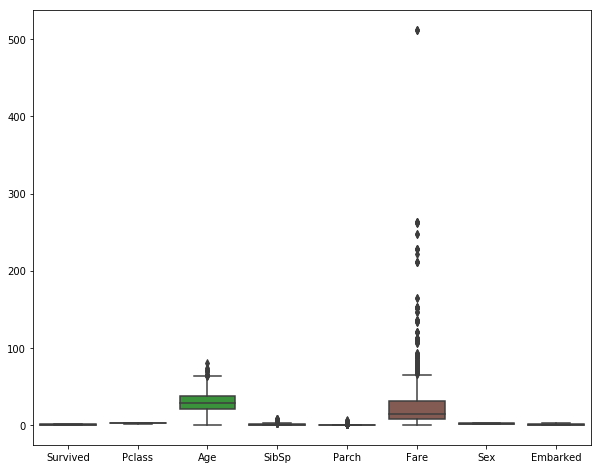

In [31]:
outliers = data[factors]

plt.figure(figsize=(10,8))

sns.boxplot(data = outliers)

plt.show()


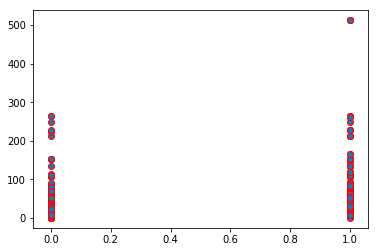

In [32]:
plt.scatter(data['Survived'],data['Fare'],edgecolors = "r")


**simple trick that i will use is to clear away only data points that are +3 std for the mean using the Z-score**

In [33]:

from scipy import stats

data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

**now for ML part**

In [34]:

x_train = data.drop("Survived", axis=1)

y_train = data["Survived"]

x_test  = test.drop("PassengerId", axis=1).copy()

x_train.shape, y_train.shape, x_test.shape

((825, 7), (825,), (418, 7))

In [42]:
#for decisionTree 

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(n_estimators = 50)

clf.fit(x_train , y_train)

prd = clf.predict(x_test)

acc = clf.score(x_train , y_train)

print('accuracy is % : ', (acc*100))




accuracy is % :  86.54545454545455


In [43]:
submission = pd.DataFrame({ "PassengerId": test["PassengerId"], "Survived": prd })

In [44]:
#last thing creating the csv file 

submission.to_csv('C:\\Users\\NGSi\\Downloads\\Programs\\submission.csv', index=False)
